In [1]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV

In [76]:
# Load Data (new way)
import os
print(os.getcwd())

path = os.getcwd()

# Load dataset
data = pd.read_csv(path+"/../Data Wifi/trainingData.csv")

C:\Users\Thomas S\Documents\Ubiqum\3. IoT Analytics\3. Evaluate Techniques for Wifi Locationing\Scripts Wifi


In [20]:
# Load Data (old way)
# data = pd.read_csv("C:/Users/Thomas S/Documents/Ubiqum/3. IoT Analytics/3. Evaluate Techniques for Wifi Locationing/Data Wifi/trainingData.csv")

NameError: name '__file__' is not defined

In [43]:
# initial Data exploration ALL

# check for NAs
print(data.isna().sum())

# shape: no. of rows & columns of df
print(data.shape)

# head: print first 20 rows
print(data.head(20))

# describe: statistics of the attributes
print(data.describe())

WAP001              0
WAP002              0
WAP003              0
WAP004              0
WAP005              0
                   ..
SPACEID             0
RELATIVEPOSITION    0
USERID              0
PHONEID             0
TIMESTAMP           0
Length: 529, dtype: int64
(19937, 529)
    WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0      100     100     100     100     100     100     100     100     100   
1      100     100     100     100     100     100     100     100     100   
2      100     100     100     100     100     100     100     -97     100   
3      100     100     100     100     100     100     100     100     100   
4      100     100     100     100     100     100     100     100     100   
5      100     100     100     100     100     100     100     100     100   
6      100     100     100     100     100     100     100     100     100   
7      100     100     100     100     100     100     100     100     100   
8      100     10

In [44]:
# Initial Data Exploration Categorial Data

# Summarize Categorial Data BuildingID
print(pd.DataFrame(data['BUILDINGID'].value_counts()).rename(columns={'BUILDINGID':'COUNTS'}))

# Summarize Categorial Data SpaceID
print(pd.DataFrame(data['SPACEID'].value_counts()).rename(columns={'SPACEID':'COUNTS'}))

# Summarize Categorial Data SpaceID
print(pd.DataFrame(data['RELATIVEPOSITION'].value_counts()).rename(columns={'RELATIVEPOSITION':'COUNTS'}))

# Summarize Categorial Data SpaceID
print(pd.DataFrame(data['USERID'].value_counts()).rename(columns={'USERID':'COUNTS'}))

# Summarize Categorial Data SpaceID
print(pd.DataFrame(data['PHONEID'].value_counts()).rename(columns={'PHONEID':'COUNTS'}))


   COUNTS
2    9492
0    5249
1    5196
     COUNTS
202     484
106     475
107     469
104     439
101     418
..      ...
27       17
14       12
142      10
22       10
254      10

[123 rows x 1 columns]
   COUNTS
2   16608
1    3329
    COUNTS
11    4516
1     2737
14    1596
7     1383
2     1091
9     1066
16    1032
6      980
10     913
13     841
17     724
5      610
8      507
15     498
18     440
12     437
4      374
3      192
    COUNTS
14    4835
13    4516
7     1596
6     1383
23    1091
19     980
8      913
17     841
22     724
3      610
1      507
11     498
10     440
24     437
18     374
16     192


In [39]:
# initial Data exploration GroupBy

# grouby: distribution of classes - FLOOR
print(data.groupby('FLOOR').size())

# grouby: distribution of classes - BUILDINGID
print(data.groupby('BUILDINGID').size())

# grouby: distribution of classes - SPACEID
print(data.groupby('SPACEID').size())

# grouby: distribution of classes - RELATIVEPOSITION
print(data.groupby('RELATIVEPOSITION').size())

# grouby: distribution of classes - USERID
print(data.groupby('USERID').size())

# grouby: distribution of classes - PHONEID
print(data.groupby('PHONEID').size())

FLOOR
0    4369
1    5002
2    4416
3    5048
4    1102
dtype: int64
BUILDINGID
0    5249
1    5196
2    9492
dtype: int64
SPACEID
1       65
2       80
3       97
4       95
5       60
      ... 
248    110
249     30
250     20
253     20
254     10
Length: 123, dtype: int64
RELATIVEPOSITION
1     3329
2    16608
dtype: int64
USERID
1     2737
2     1091
3      192
4      374
5      610
6      980
7     1383
8      507
9     1066
10     913
11    4516
12     437
13     841
14    1596
15     498
16    1032
17     724
18     440
dtype: int64
PHONEID
1      507
3      610
6     1383
7     1596
8      913
10     440
11     498
13    4516
14    4835
16     192
17     841
18     374
19     980
22     724
23    1091
24     437
dtype: int64


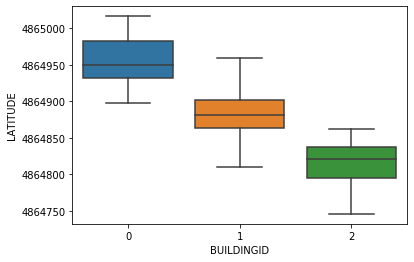

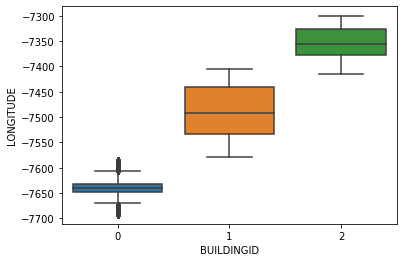

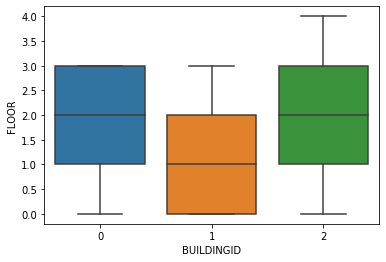

In [7]:
# initial data visualization

#data['LONGITUDE]'.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
#pyplot.show()

# boxplots Longitude
plot1 = plt.figure(1)
sns.boxplot(x ='BUILDINGID', y = 'LATITUDE', data = data)

#boxplot Latitude
plot2 = plt.figure(2)
sns.boxplot(x ='BUILDINGID', y = 'LONGITUDE', data = data)

#boxplot Latitude
plot3 = plt.figure(3)
sns.boxplot(x ='BUILDINGID', y = 'FLOOR', data = data)

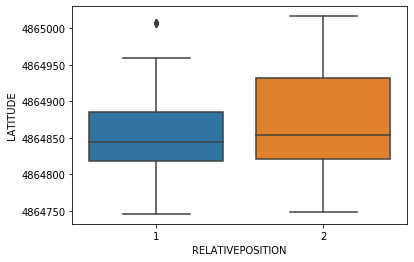

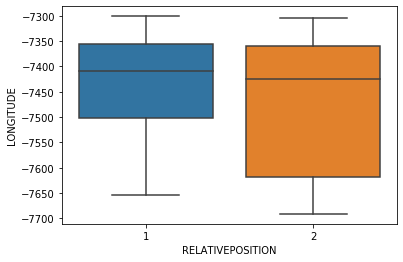

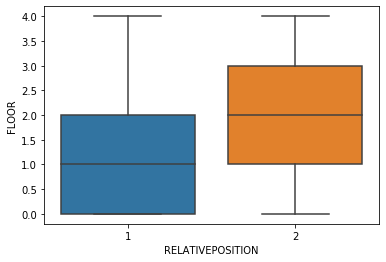

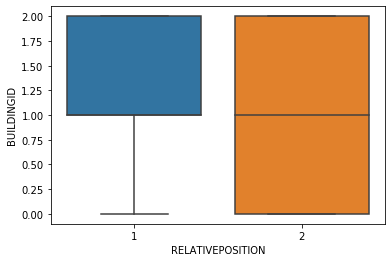

In [8]:
# boxplot RELATIVEPOSITION
# boxplots Longitude
plot1 = plt.figure(1)
sns.boxplot(x ='RELATIVEPOSITION', y = 'LATITUDE', data = data)

#boxplot LONGITUDE
plot2 = plt.figure(2)
sns.boxplot(x ='RELATIVEPOSITION', y = 'LONGITUDE', data = data)

#boxplot FLOOR
plot3 = plt.figure(3)
sns.boxplot(x ='RELATIVEPOSITION', y = 'FLOOR', data = data)

#boxplot BUILDINGID
plot4 = plt.figure(4)
sns.boxplot(x ='RELATIVEPOSITION', y = 'BUILDINGID', data = data)

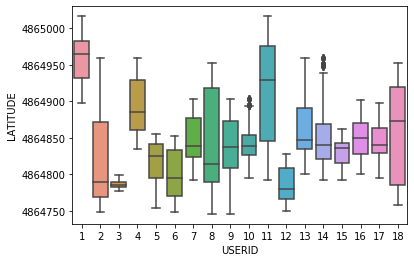

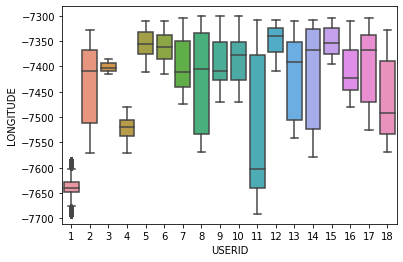

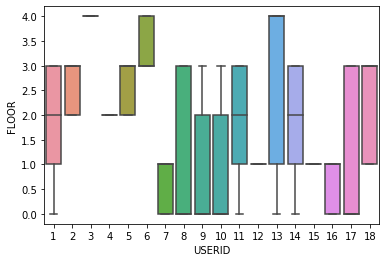

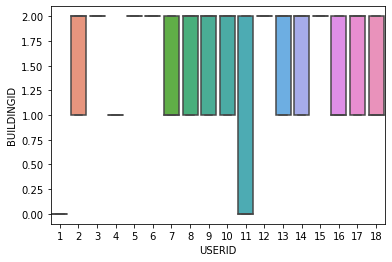

In [9]:
# boxplot USERID
# boxplots Longitude
plot1 = plt.figure(1)
sns.boxplot(x ='USERID', y = 'LATITUDE', data = data)

#boxplot LONGITUDE
plot2 = plt.figure(2)
sns.boxplot(x ='USERID', y = 'LONGITUDE', data = data)

#boxplot FLOOR
plot3 = plt.figure(3)
sns.boxplot(x ='USERID', y = 'FLOOR', data = data)

#boxplot BUILDINGID
plot4 = plt.figure(4)
sns.boxplot(x ='USERID', y = 'BUILDINGID', data = data)

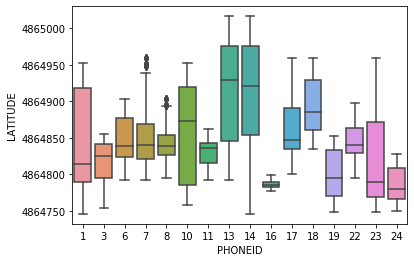

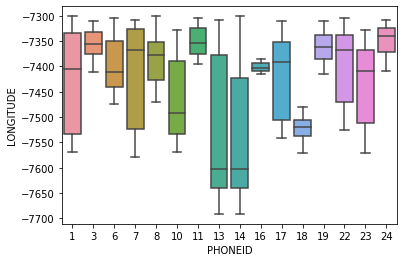

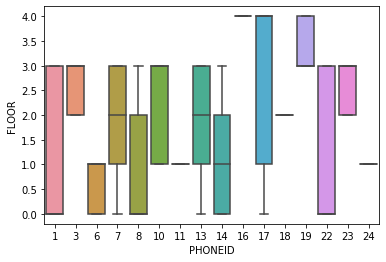

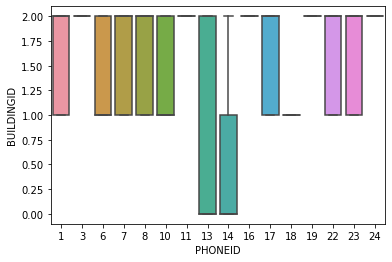

In [10]:
# boxplot PHONEID
# boxplots Longitude
plot1 = plt.figure(1)
sns.boxplot(x ='PHONEID', y = 'LATITUDE', data = data)

#boxplot LONGITUDE
plot2 = plt.figure(2)
sns.boxplot(x ='PHONEID', y = 'LONGITUDE', data = data)

#boxplot FLOOR
plot3 = plt.figure(3)
sns.boxplot(x ='PHONEID', y = 'FLOOR', data = data)

#boxplot BUILDINGID
plot4 = plt.figure(4)
sns.boxplot(x ='PHONEID', y = 'BUILDINGID', data = data)

In [77]:
bins = np.linspace(min(data['TIMESTAMP']), max(data['TIMESTAMP']),11)

group_names = ['1','2','3','4','5','6','7','8','9','10']

data['TIMESTAMP_BINNED'] = pd.cut(data['TIMESTAMP'], bins, labels = group_names, include_lowest = True)

#print(data['TIMESTAMP_BINNED'].head)

#sns.regplot(x = 'TIMESTAMP_BINNED', y = 'LATITUDE', data = data)

In [80]:
# preprocess data
print(data.head())

#replace 100 by -105
data.iloc[:,0:520] = data.replace(to_replace = 100, value = -105)

print(data.head(15))

#covert power from dBm to mW

#data.iloc[:,0:520] = (10**(data.iloc[:,0:520]/10))*100000000

#print(data.head(15))

#standardize by row
data.iloc[:,0:520] = data.iloc[:,0:520].div(data.iloc[:,0:520].sum(axis = 1), axis = 0)

print(data.head())

   WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0    -105    -105    -105    -105    -105    -105    -105    -105    -105   
1    -105    -105    -105    -105    -105    -105    -105    -105    -105   
2    -105    -105    -105    -105    -105    -105    -105     -97    -105   
3    -105    -105    -105    -105    -105    -105    -105    -105    -105   
4    -105    -105    -105    -105    -105    -105    -105    -105    -105   

   WAP010  ...  LONGITUDE      LATITUDE  FLOOR  BUILDINGID  SPACEID  \
0    -105  ... -7541.2643  4.864921e+06      2           1      106   
1    -105  ... -7536.6212  4.864934e+06      2           1      106   
2    -105  ... -7519.1524  4.864950e+06      2           1      103   
3    -105  ... -7524.5704  4.864934e+06      2           1      102   
4    -105  ... -7632.1436  4.864982e+06      0           0      122   

   RELATIVEPOSITION  USERID  PHONEID   TIMESTAMP  TIMESTAMP_BINNED  
0                 2       2       23  137

In [ ]:
# hyper-parameter optimization


In [81]:
# select & splitt data

array = data.values

# X should include all columns from 0 to 528 excluding columns 520 to 525
X = data.iloc[:,0:520]

# Y should includa only columns from 520 to 523
Y_Log = data.iloc[:,520]
Y_Lat = data.iloc[:,521]
Y_Flo = data.iloc[:,522]
Y_BuID = data.iloc[:,523]

# Train_test split per dependent variable (Y)
X_train, X_validation, Y_Log_train, Y_Log_Validation = train_test_split(X,Y_Log,test_size = 0.2, random_state = 1)

X_train, X_validation, Y_Lat_train, Y_Lat_Validation = train_test_split(X,Y_Lat,test_size = 0.2, random_state = 1)

X_train, X_validation, Y_Flo_train, Y_Flo_Validation = train_test_split(X,Y_Flo,test_size = 0.2, random_state = 1)

X_train, X_validation, Y_BuID_train, Y_BuID_Validation = train_test_split(X,Y_BuID,test_size = 0.2, random_state = 1)

print(X_train.shape), print(X_validation.shape)

print (Y_Log_train.shape), print(Y_Log_Validation.shape)
print(Y_Lat_train.shape), print(Y_Lat_Validation.shape)
print(Y_Flo_train.shape), print(Y_Flo_Validation.shape)
print(Y_BuID_train.shape), print(Y_BuID_Validation.shape)

#Y_Log_train_sample = Y_BuID_train.sample(frac = 0.05)
#Y_Lat_train_sample = Y_BuID_train.sample(frac = 0.05)
#Y_Flo_train_sample = Y_BuID_train.sample(frac = 0.05)
#Y_BuID_train_sample = Y_BuID_train.sample(frac = 0.05)

#print(Y_Log_train_sample.shape)
#print(Y_Lat_train_sample.shape)
#print(Y_Flo_train_sample.shape)
#print(Y_BuID_train_sample.shape)

Log_train_Sample = pd.concat([X_train, Y_Log_train], axis = 1). sample(frac = 0.05)
Lat_train_Sample = pd.concat([X_train, Y_Lat_train], axis = 1). sample(frac = 0.05)
Flo_train_Sample = pd.concat([X_train, Y_Flo_train], axis = 1). sample(frac = 0.05)
BuID_train_Sample = pd.concat([X_train, Y_BuID_train], axis = 1).sample(frac = 0.05)

print(Log_train_Sample.head(10))
print(Log_train_Sample.shape)
print(Lat_train_Sample.head(10))
print(Lat_train_Sample.shape)
print(Flo_train_Sample.head(10))
print(Flo_train_Sample.shape)
print(BuID_train_Sample.head(10))
print(BuID_train_Sample.shape)

Log_X_train_Sample = Log_train_Sample.iloc[:,0:520]
Log_Y_train_Sample = Log_train_Sample.iloc[:,520]

Lat_X_train_Sample = Lat_train_Sample.iloc[:,0:520]
Lat_Y_train_Sample = Lat_train_Sample.iloc[:,520]

Flo_X_train_Sample = Flo_train_Sample.iloc[:,0:520]
Flo_Y_train_Sample = Flo_train_Sample.iloc[:,520]

BuID_X_train_Sample = BuID_train_Sample.iloc[:,0:520]
BuID_Y_train_Sample = BuID_train_Sample.iloc[:,520]

#print(Flo_Y_train_Sample)
#print(type(Flo_Y_train_Sample))
#print(Flo_Y_train_Sample.head(10))

#print(Log_Y_train_Sample)
#print(type(Log_Y_train_Sample))
#print(Log_Y_train_Sample.head(10))
#print(type(Log_X_train_Sample))
#print(Log_X_train_Sample.head(10))


(15949, 520)
(3988, 520)
(15949,)
(3988,)
(15949,)
(3988,)
(15949,)
(3988,)
(15949,)
(3988,)
         WAP001    WAP002    WAP003    WAP004    WAP005    WAP006    WAP007  \
5289   0.001938  0.001938  0.001938  0.001938  0.001938  0.001938  0.001938   
13936  0.001942  0.001942  0.001942  0.001942  0.001942  0.001942  0.001942   
12562  0.001940  0.001940  0.001940  0.001940  0.001940  0.001940  0.001940   
18247  0.001941  0.001941  0.001941  0.001941  0.001941  0.001941  0.001941   
2788   0.001938  0.001938  0.001938  0.001938  0.001938  0.001938  0.001938   
2494   0.001939  0.001939  0.001939  0.001939  0.001939  0.001939  0.001939   
1310   0.001936  0.001936  0.001936  0.001936  0.001936  0.001936  0.001936   
11410  0.001933  0.001933  0.001933  0.001933  0.001933  0.001933  0.001933   
8039   0.001935  0.001935  0.001935  0.001935  0.001935  0.001935  0.001622   
8638   0.001937  0.001937  0.001937  0.001937  0.001937  0.001937  0.001937   

         WAP008    WAP009    WAP010  

In [270]:
#Models Longitude (with sample data)

# build models 
models =[]

#models.append(('KNNRG', KNeighborsRegressor(leaf_size = 2, n_neighbors=4, p = 1)))
models.append(('RF', RandomForestRegressor(n_estimators=100)))
#models.append(('RIDGE', Ridge(alpha=.5)))
#models.append(('SVM2', svm.SVR()))

#models.append(('CART', DecisionTreeRegressor()))
#models.append(('RF', RandomForestRegressor(n_estimators=400)))
#models.append(('SVM2', svm.SVR(kernel = 'linear', C = 1)))
#models.append(('SVM3', svm.LinearSVR(C = 1, max_iter = 1000)))
#models.append(('SVM4', svm.SVR(kernel = 'rbf', gamma = 0.7, C = 1)))
#models.append(('SVM5', svm.SVR(kernel = 'poly', degree = 10, gamma = 'auto', C = 1)))
#models.append(('SGD', SGDRegressor()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    print (name, model)
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X = X_train, y = Y_Log_train, cv=10, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    

RF RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
RF: -72.108196 (16.921377)


In [268]:
# Hyperparameter Tuning KNNRG for Longitude

#List Hyperparameter to tune
leaf_size = list(range(1,8))
n_neighbors = list(range(1,8))
p = [1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size = leaf_size,
n_neighbors = n_neighbors, p = p)

#Create new KNN object
knn_1 = KNeighborsRegressor()

#Use GridSearch
clf1 = GridSearchCV(knn_1, hyperparameters, cv = 10, n_jobs = -1)

#Fit the model
best_model = clf1.fit(X_train,Y_Log_train)

#Print the values of the best Hyperparameters
print('Best leaf size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf size: 2
Best p: 1
Best n_neighbors: 4


In [260]:
#Models Latitude (with sample data)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

models =[]

models.append(('KNNRG', KNeighborsRegressor(leaf_size = 1, n_neighbors=3, p = 1)))
#models.append(('RIDGE', Ridge(alpha=.5)))
#models.append(('SVM2', svm.SVR()))

#models.append(('CART', DecisionTreeRegressor()))
#models.append(('RF', RandomForestRegressor(n_estimators=400)))
#models.append(('SVM2', svm.SVR(kernel = 'linear', C = 1)))
#models.append(('SVM3', svm.LinearSVR(C = 1, max_iter = 1000)))
#models.append(('SVM4', svm.SVR(kernel = 'rbf', gamma = 0.7, C = 1)))
#models.append(('SVM5', svm.SVR(kernel = 'poly', degree = 10, gamma = 'auto', C = 1)))
#models.append(('SGD', SGDRegressor()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    print (name, model)
    cv_results = cross_val_score(model, X = X_train, y = Y_Lat_train, cv=10, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNNRG KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                    weights='uniform')
KNNRG: -24.377867 (8.098126)


In [256]:
#Hyperparameter Tuning KNNRG for Latitude

#List Hyperparameter to tune
leaf_size = list(range(1,8))
n_neighbors = list(range(1,8))
p = [1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size = leaf_size,
n_neighbors = n_neighbors, p = p)

#Create new KNN object
knn_2 = KNeighborsRegressor()

#Use GridSearch
clf2 = GridSearchCV(knn_2, hyperparameters, cv = 10, n_jobs = -1)

#Fit the model
best_model = clf2.fit(X_train,Y_Lat_train)

#Print the values of the best Hyperparameters
print('Best leaf size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf size: 1
Best p: 1
Best n_neighbors: 3


In [263]:
#Models Floor (with sample data)
from sklearn import svm

from sklearn.linear_model import SGDClassifier

# build models 
models =[]

models.append(('KNN', KNeighborsClassifier(leaf_size = 1, n_neighbors = 1, p = 2)))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('RF', RandomForestClassifier(n_estimators=400)))
#models.append(('SGD', SGDClassifier(loss = 'squared_hinge', penalty = 'l2', max_iter = 20, alpha = 0.0005)))

#models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
#models.append(('SVM2', svm.SVC(kernel = 'linear', C = 1)))
#models.append(('SVM3', svm.LinearSVC(C = 1, max_iter = 10000)))
#models.append(('SVM4', svm.SVC(kernel = 'rbf', gamma = 0.7, C = 1)))
#models.append(('SVM5', svm.SVC(kernel = 'poly', degree = 10, gamma = 'auto', C = 1)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model,X_train, Y_Flo_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.996614 (0.001321)


In [262]:
#Hyperparameter Tuning KNNCL for Floor

#List Hyperparameter to tune
leaf_size = list(range(1,8))
n_neighbors = list(range(1,8))
p = [1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size = leaf_size,
n_neighbors = n_neighbors, p = p)

#Create new KNN object
knn_3 = KNeighborsClassifier()

#Use GridSearch
clf3 = GridSearchCV(knn_3, hyperparameters, cv = 10, n_jobs = -1)

#Fit the model
best_model = clf3.fit(X_train,Y_Flo_train)

#Print the values of the best Hyperparameters
print('Best leaf size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf size: 1
Best p: 2
Best n_neighbors: 1


In [261]:
#Models BuID NEW (with sample data)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# build models 
models =[]

#models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(leaf_size = 1, n_neighbors = 1, p = 2)))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
#models.append(('RF', RandomForestClassifier(n_estimators=200)))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model,X_train, Y_BuID_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
print(results)

KNN: 0.997743 (0.000939)
[array([0.9968652 , 0.99937304, 0.99749216, 0.99749216, 0.9968652 ,
       0.9968652 , 0.99811912, 0.99937304, 0.99811912, 0.99686324])]


In [ ]:
#Hyperparameter Tuning KNNCL for BuID

#List Hyperparameter to tune
leaf_size = list(range(1,8))
n_neighbors = list(range(1,8))
p = [1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size = leaf_size,
n_neighbors = n_neighbors, p = p)

#Create new KNN object
knn_4 = KNeighborsClassifier()

#Use GridSearch
clf4 = GridSearchCV(knn_4, hyperparameters, cv = 10, n_jobs = -1)

#Fit the model
best_model = clf4.fit(X_train,Y_BuID_train)

#Print the values of the best Hyperparameters
print('Best leaf size:', best_model.best_estimator_.get_parms()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [267]:
print('Best leaf size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

NameError: name 'clf4' is not defined

In [62]:
#Models BuID OLD

from sklearn.neighbors import KNeighborsClassifier

# build models 
models =[]

models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_BuID_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

CART: 0.996363 (0.001424)
KNN: 0.997429 (0.000906)


ValueError: Dimensions of labels and X must be compatible

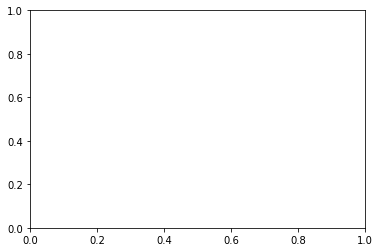

In [107]:
# BuID compare algorithms

pyplot.boxplot(results, labels=name)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# Longitude Make predictions on validation dataset

#choose model
#model = KNeighborsClassifier(n_neighbors=11)
#model = LinearDiscriminantAnalysis()
#model = RandomForestClassifier(n_estimators=200)
model = KNeighborsRegressor(n_neighbors=12)

#apply model to all training data
model.fit(X_train, Y_Log_train)

#make predictions of validation data with model (trained on training data)
predictions = model.predict(X_validation)


# Longitude Evaluate predictions

print(accuracy_score(Y_Log_Validation, predictions))

print(confusion_matrix(Y_Log_Validation, predictions))

print(classification_report(Y_Log_Validation, predictions))

In [248]:
# Latitude Make predictions on validation dataset

from sklearn.metrics import mean_squared_error
#choose model
#model = KNeighborsClassifier(n_neighbors=11)
#model = LinearDiscriminantAnalysis()
#model = RandomForestClassifier(n_estimators=200)
#model = KNeighborsRegressor(n_neighbors=11)

#apply model to all training data
model.fit(X_train, Y_Lat_train)

#make predictions of validation data with model (trained on training data)
predictions = model.predict(X_validation)


# Latitude Evaluate predictions

print(mean_squared_error(Y_Lat_Validation, predictions))

#print(confusion_matrix(Y_Lat_Validation, predictions))

#print(classification_report(Y_Lat_Validation, predictions))

64.66597770237372


In [241]:
# Floor Make predictions on validation dataset

#choose model
#model = KNeighborsClassifier(n_neighbors=11)
#model = LinearDiscriminantAnalysis()
model = RandomForestClassifier(n_estimators=200)

#apply model to all training data
model.fit(X_train, Y_Flo_train)

#make predictions of validation data with model (trained on training data)
predictions = model.predict(X_validation)


# Floor Evaluate predictions

print(accuracy_score(Y_Flo_Validation, predictions))

print(confusion_matrix(Y_Flo_Validation, predictions))

print(classification_report(Y_Flo_Validation, predictions))

0.9924774322968907
[[ 859    0    0    9    0]
 [   4  986    1    2    0]
 [   0    6  879    6    0]
 [   0    0    2 1029    0]
 [   0    0    0    0  205]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       868
           1       0.99      0.99      0.99       993
           2       1.00      0.99      0.99       891
           3       0.98      1.00      0.99      1031
           4       1.00      1.00      1.00       205

    accuracy                           0.99      3988
   macro avg       0.99      0.99      0.99      3988
weighted avg       0.99      0.99      0.99      3988



In [239]:
# BuID Make predictions on validation dataset

#choose model
#model = KNeighborsClassifier(n_neighbors=11)
model =LinearDiscriminantAnalysis()


#apply model to all training data
model.fit(X_train, Y_BuID_train)

#make predictions of validation data with model (trained on training data)
predictions = model.predict(X_validation)

In [240]:
# BuID Evaluate predictions

print(accuracy_score(Y_BuID_Validation, predictions))

print(confusion_matrix(Y_BuID_Validation, predictions))

print(classification_report(Y_BuID_Validation, predictions))

0.9962387161484454
[[1024    0    1]
 [   0 1016   12]
 [   0    2 1933]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1025
           1       1.00      0.99      0.99      1028
           2       0.99      1.00      1.00      1935

    accuracy                           1.00      3988
   macro avg       1.00      1.00      1.00      3988
weighted avg       1.00      1.00      1.00      3988



In [ ]:
# summary